In [ ]:
# FINANCIAL OPERATIONS ANALYTICS PROJECT
# ===============================================================================
#Complete End-to-End Analytics Pipeline for Financial Services

#Project: Revenue Forecasting, Churn & Profitability Analysis
#Domains: Banking, SaaS, Financial Services
#Duration:  hours comprehensive tutorial

#Analytics Covered:
#- Time Series Analysis (ARIMA)
#- Regression Analysis ( Logistic, Random Forest)
# Retention Analysis
#- Customer Lifetime Value (CLV)
#- RFM Segmentation



# Our analysis will answer these critical business questions:
#
# =========================
# REVENUE FORECASTING
# =========================
# Q1: What is our expected revenue for the next 12 months?
# Q2: Are there seasonal patterns in our revenue?
# Q3: What factors drive revenue growth?
# Q4: What is our revenue growth rate and overall trend?
#
# =========================
# CHURN ANALYSIS
# =========================
# Q5: Which customers are most likely to churn in the next 3 months?
# Q6: What are the key indicators of customer churn?
# Q7: What is the financial impact of churn on the business?
# Q8: How does churn vary across different customer segments?
# Q9: Customer Segmentation using recency 
# Q10:How does customer lifetime value (CLV) vary by segment?
# Q11: Revenue Contribution :Active vs Churned Customers,Churn Rate by indistry,churn rate by contract length

# =========================
# CUSTOMER SEGMENTATION
# =========================
# Q13: Can we identify distinct customer groups for targeted strategies?
# Q14: Which customer segments are the most profitable?
# Q15: Plan Wise Profitability ?


In [20]:
# Basic Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore")

In [21]:
cust=pd.read_csv('financial_customers.csv')

In [22]:
import pandas as pd
import numpy as np

# Load existing customer file
customers = pd.read_csv("financial_customers.csv")

# -----------------------------
# 1. Convert date columns
# -----------------------------
date_cols = ["signup_date", "churn_date", "last_transaction_date"]
for col in date_cols:
    customers[col] = pd.to_datetime(customers[col], errors="coerce")

# -----------------------------
# 2. Fix numeric column dtypes
# -----------------------------
int_cols = [
    "mrr", "contract_length", "number_of_users",
    "support_tickets", "usage_score",
    "recency_days", "transaction_count"
]

for col in int_cols:
    customers[col] = customers[col].astype("int64")

float_cols = [
    "is_churned", "lifetime_months",
    "total_revenue", "clv", "avg_transaction_value"
]

for col in float_cols:
    customers[col] = customers[col].astype("float64")

# -----------------------------
# 3. Fix cohort_month to period[M]
# -----------------------------
customers["cohort_month"] = pd.to_datetime(customers["cohort_month"]).dt.to_period("M")

# -----------------------------
# 4. ADD MISSING COLUMNS
# -----------------------------

# cohort_year
customers["cohort_year"] = customers["cohort_month"].dt.year.astype("int32")

# payback_months
customers["payback_months"] = (customers["clv"] / customers["mrr"]).round(2)

# ml_cluster (synthetic assignment)
customers["ml_cluster"] = np.random.choice(
    [0, 1, 2, 3, 4],
    size=len(customers)
).astype("float64")

# -----------------------------
# 5. Reorder columns (extra columns added at the end)
# -----------------------------
final_columns = [
    "customer_id",
    "signup_date",
    "segment",
    "industry",
    "country",
    "plan",
    "mrr",
    "contract_length",
    "number_of_users",
    "support_tickets",
    "usage_score",
    "nps_score",
    "churn_date",
    "is_churned",
    "lifetime_months",
    "total_revenue",
    "clv",
    "last_transaction_date",
    "recency_days",
    "transaction_count",
    "avg_transaction_value",
    "cohort_month",
    "cohort_year",
    "payback_months",
    "ml_cluster"
]

customers = customers[final_columns]

# -----------------------------
# 6. Save cleaned file
# -----------------------------
customers.to_csv("financial_cust.csv", index=False)

print("✅ Customer file fixed and saved as synthetic_customers_fixed.csv")
print(customers.dtypes)


✅ Customer file fixed and saved as synthetic_customers_fixed.csv
customer_id                      object
signup_date              datetime64[ns]
segment                          object
industry                         object
country                          object
plan                             object
mrr                               int64
contract_length                   int64
number_of_users                   int64
support_tickets                   int64
usage_score                       int64
nps_score                         int64
churn_date               datetime64[ns]
is_churned                      float64
lifetime_months                 float64
total_revenue                   float64
clv                             float64
last_transaction_date    datetime64[ns]
recency_days                      int64
transaction_count                 int64
avg_transaction_value           float64
cohort_month                  period[M]
cohort_year                       int32
payback_months 

In [23]:
# 1. Understanding Customer_Data 
cust.shape


(5000, 22)

In [24]:
finan_cust=pd.read_csv('financial_cust.csv')
finan_cust.head()

,customer_id,signup_date,segment,industry,country,plan,mrr,contract_length,number_of_users,support_tickets,...,total_revenue,clv,last_transaction_date,recency_days,transaction_count,avg_transaction_value,cohort_month,cohort_year,payback_months,ml_cluster
0,CUST_000001,2023-01-31,Startup,Healthcare,Other,Basic,49,24,3,2,...,1194.63,1194.63,2024-12-28,3,24,49.776250,2023-01,2023,24.38,0.0
1,CUST_000002,2023-12-30,Startup,Retail,USA,Basic,49,12,4,1,...,676.89,676.89,2024-12-29,2,13,52.068462,2023-12,2023,13.81,2.0
2,CUST_000003,2022-05-10,Small Business,Retail,Other,Professional,149,12,8,1,...,3470.20,3470.20,2024-03-10,296,23,150.878261,2022-05,2022,23.29,2.0
3,CUST_000004,2023-07-18,Startup,Retail,USA,Business,399,1,1,3,...,7107.69,7107.69,2024-12-18,13,18,394.871667,2023-07,2023,17.81,3.0
4,CUST_000005,2023-02-04,Startup,Technology,USA,Business,399,12,2,0,...,9839.84,9839.84,2024-12-04,27,23,427.819130,2023-02,2023,24.66,3.0


In [25]:
finan_cust.dtypes

customer_id               object
signup_date               object
segment                   object
industry                  object
country                   object
plan                      object
mrr                        int64
contract_length            int64
number_of_users            int64
support_tickets            int64
usage_score                int64
nps_score                  int64
churn_date                object
is_churned               float64
lifetime_months          float64
total_revenue            float64
clv                      float64
last_transaction_date     object
recency_days               int64
transaction_count          int64
avg_transaction_value    float64
cohort_month              object
cohort_year                int64
payback_months           float64
ml_cluster               float64
dtype: object

In [26]:
cust.describe()

,mrr,contract_length,number_of_users,support_tickets,usage_score,nps_score,is_churned,lifetime_months,total_revenue,clv,recency_days,transaction_count,avg_transaction_value
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,265.57000,13.695000,38.106200,2.023800,64.499400,28.371600,0.131200,26.944940,7166.833910,7166.833910,108.697600,27.043600,270.394273
std,286.75317,11.031986,90.640461,1.436261,19.177892,38.396739,0.337653,17.484849,10101.575347,10101.575347,286.277569,17.226545,292.125380
min,49.00000,1.000000,1.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,44.540000,44.540000,1.000000,1.000000,44.540000
25%,49.00000,1.000000,3.000000,1.000000,51.000000,2.000000,0.000000,11.700000,1253.485000,1253.485000,9.000000,12.000000,50.317708
50%,149.00000,12.000000,7.000000,2.000000,65.000000,29.000000,0.000000,24.000000,2907.190000,2907.190000,18.000000,24.000000,151.275981
75%,399.00000,24.000000,26.000000,3.000000,78.000000,56.000000,0.000000,41.700000,8348.680000,8348.680000,27.000000,42.000000,403.708208
max,999.00000,36.000000,499.000000,9.000000,100.000000,100.000000,1.000000,60.900000,61514.520000,61514.520000,1717.000000,60.000000,1182.192000


In [27]:
missing_summary=pd.DataFrame({
    "column":finan_cust.columns,
    "missing_count":finan_cust.isnull().sum(),
    "missing_percentage":(finan_cust.isnull().sum()/len(cust)*100).round(2)
})
missing_summary[missing_summary["missing_count"]>0]
if len(missing_summary) > 0:
    print(missing_summary.to_string(index=False))
else:
    print(" No missing values detected!")

               column  missing_count  missing_percentage
          customer_id              0                0.00
          signup_date              0                0.00
              segment              0                0.00
             industry              0                0.00
              country              0                0.00
                 plan              0                0.00
                  mrr              0                0.00
      contract_length              0                0.00
      number_of_users              0                0.00
      support_tickets              0                0.00
          usage_score              0                0.00
            nps_score              0                0.00
           churn_date           4344               86.88
           is_churned              0                0.00
      lifetime_months              0                0.00
        total_revenue              0                0.00
                  clv          

In [28]:
#Transaction Data Exploration
trans=pd.read_csv("financial_transactions.csv")
trans.shape

(135218, 10)

In [29]:
trans.head()

,transaction_id,customer_id,transaction_date,amount,transaction_type,status,payment_method,year_month,cohort_month,transaction_month
0,CUST_000001_TXN_0001,CUST_000001,2023-01-31,52.78,New,Completed,Credit Card,2023-01,2023-01,2023-01
1,CUST_000001_TXN_0002,CUST_000001,2023-02-28,52.87,Subscription,Completed,Credit Card,2023-02,2023-01,2023-02
2,CUST_000001_TXN_0003,CUST_000001,2023-03-28,52.84,Subscription,Completed,Credit Card,2023-03,2023-01,2023-03
3,CUST_000001_TXN_0004,CUST_000001,2023-04-28,53.22,Subscription,Completed,Credit Card,2023-04,2023-01,2023-04
4,CUST_000001_TXN_0005,CUST_000001,2023-05-28,51.86,Subscription,Completed,Wire Transfer,2023-05,2023-01,2023-05


In [30]:
print(f"Total Revenue: ${trans['amount'].sum():,.2f}")
print(f"Average Transaction: ${trans['amount'].mean():.2f}")
print(f"Median Transaction: ${trans['amount'].median():.2f}")
print(f"Std Dev: ${trans['amount'].std():.2f}")
print(f"Min Transaction: ${trans['amount'].min():.2f}")
print(f"Max Transaction: ${trans['amount'].max():.2f}")

print("\nTransaction Types:")
print(trans['transaction_type'].value_counts())

print("\nPayment Methods:")
print(trans['payment_method'].value_counts())

Total Revenue: $35,834,169.55
Average Transaction: $265.01
Median Transaction: $149.38
Std Dev: $288.41
Min Transaction: $44.10
Max Transaction: $1629.70

Transaction Types:
transaction_type
Subscription    130218
New               5000
Name: count, dtype: int64

Payment Methods:
payment_method
Credit Card      80766
ACH              27318
Wire Transfer    20430
PayPal            6704
Name: count, dtype: int64


In [31]:
# Exploring Monthly Revenue Table 
monthly_revenue=pd.read_csv('monthly_revenue.csv')
monthly_revenue.head()
print(monthly_revenue.shape)
print("First 10 periods:")
print(monthly_revenue.head(10))

print("\n\nRevenue Trend Statistics:")
print(f"Total Revenue (All Time): ${monthly_revenue['total_revenue'].sum():,.2f}")
print(f"Average Monthly Revenue: ${monthly_revenue['total_revenue'].mean():,.2f}")
print(f"Highest Month: ${monthly_revenue['total_revenue'].max():,.2f}")
print(f"Lowest Month: ${monthly_revenue['total_revenue'].min():,.2f}")
print(f"Average Growth Rate: {monthly_revenue['revenue_growth'].mean():.2f}%")

(60, 9)
First 10 periods:
   year_month  total_revenue  num_transactions  avg_transaction  \
0  2020-01-01       21878.65                97       225.553093   
1  2020-02-01       42934.00               173       248.173410   
2  2020-03-01       55509.00               239       232.255230   
3  2020-04-01       75856.80               314       241.582166   
4  2020-05-01      104698.22               409       255.985868   
5  2020-06-01      118719.53               479       247.848706   
6  2020-07-01      136785.25               560       244.259375   
7  2020-08-01      152817.37               639       239.150814   
8  2020-09-01      173125.54               714       242.472745   
9  2020-10-01      192940.47               784       246.097538   

   unique_customers  revenue_growth  month  quarter  is_q4  
0                97             NaN      1        1      0  
1               173       96.236971      2        1      0  
2               239       29.289141      3        1  

 Saved: financial_viz/01_initial_exploration.png


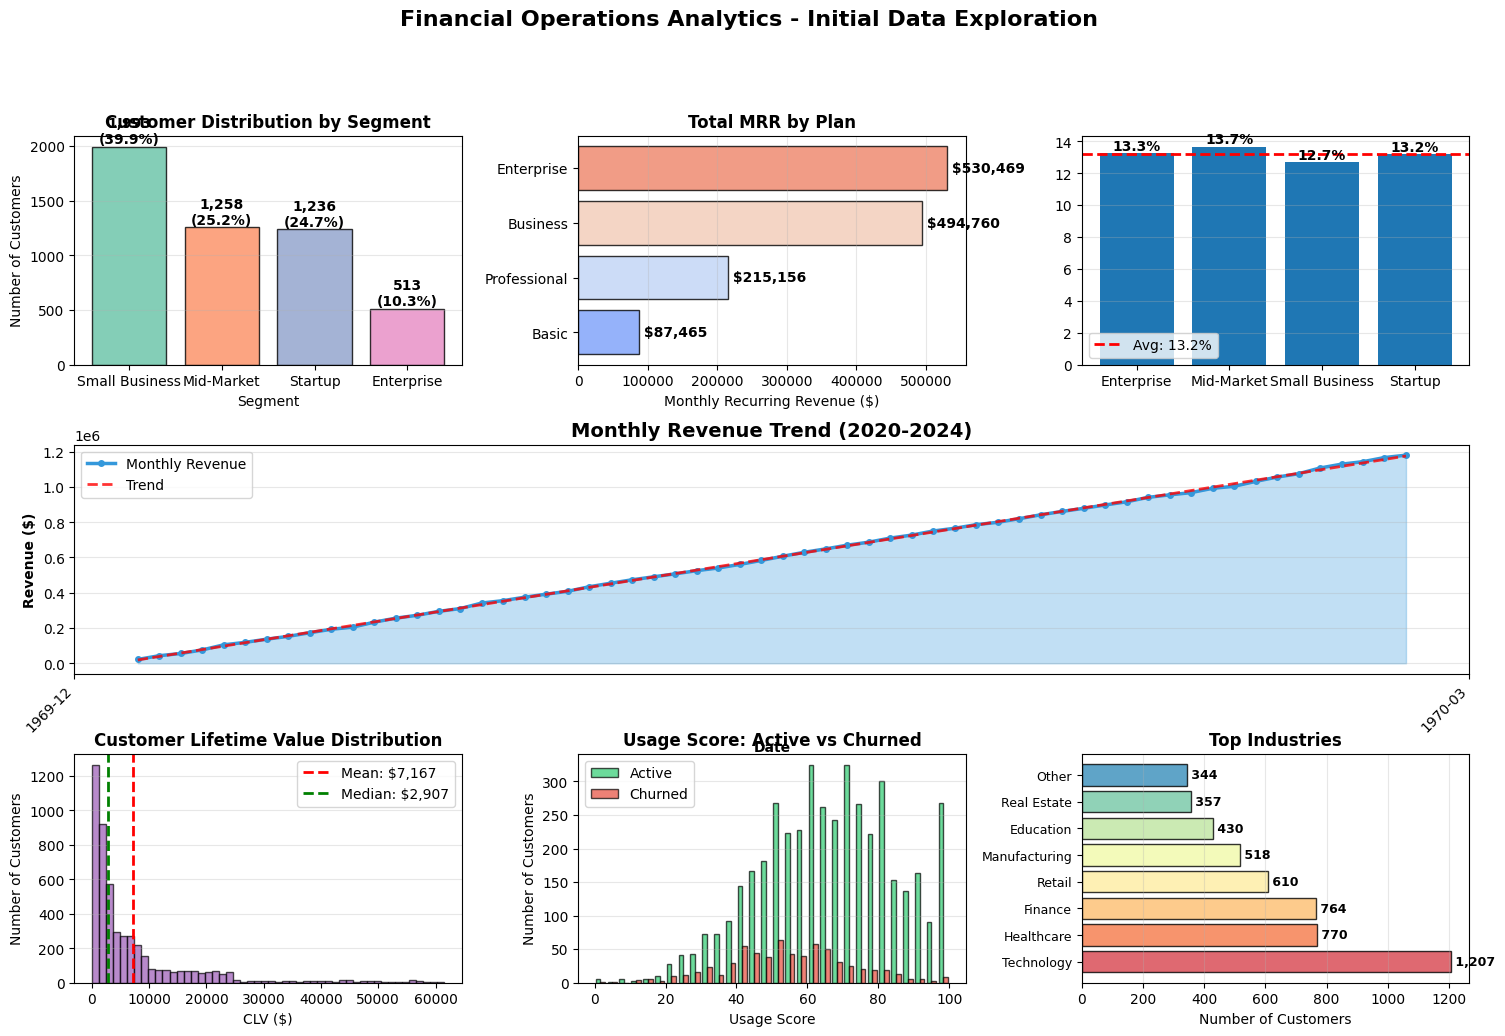


 Data exploration complete!



In [32]:
# Initial Visualization
import seaborn as sns
import matplotlib.dates as mdates
fig=plt.figure(figsize=(18,11))
gs=GridSpec(3,3,figure=fig,hspace=0.35,wspace=0.3)
#1.Customer by segment (Customers belongs to which segment)
ax1 = fig.add_subplot(gs[0, 0])
segment_counts = finan_cust['segment'].value_counts()
colors1 = sns.color_palette("Set2", len(segment_counts))
ax1.bar(segment_counts.index, segment_counts.values, color=colors1, alpha=0.8, edgecolor='black')
ax1.set_title('Customer Distribution by Segment', fontweight='bold', fontsize=12)
ax1.set_ylabel('Number of Customers')
ax1.set_xlabel('Segment')
for i, v in enumerate(segment_counts.values):
    ax1.text(i, v, f'{v:,}\n({v/len(customers)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2. Monthly Recurring Revenue by Plan
ax2 = fig.add_subplot(gs[0, 1])
plan_revenue = finan_cust.groupby('plan')['mrr'].sum().sort_values(ascending=True)
colors2 = sns.color_palette("coolwarm", len(plan_revenue))
ax2.barh(plan_revenue.index, plan_revenue.values, color=colors2, alpha=0.8, edgecolor='black')
ax2.set_title('Total MRR by Plan', fontweight='bold', fontsize=12)
ax2.set_xlabel('Monthly Recurring Revenue ($)')
for i, v in enumerate(plan_revenue.values):
    ax2.text(v, i, f' ${v:,.0f}', va='center', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)


#3.Churn Rate by Segment
ax3 = fig.add_subplot(gs[0, 2])
churn = customers.groupby('segment')['is_churned'].mean() * 100
ax3.bar(churn.index, churn.values)
ax3.axhline(y=churn.mean(), color='red', linestyle='--', 
            label=f'Avg: {churn.mean():.1f}%', linewidth=2)
for i, v in enumerate(churn.values):
    ax3.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)


# 4. Revenue Trend Over Time

ax4 = fig.add_subplot(gs[1, :])
ax4.plot(monthly_revenue['year_month'], monthly_revenue['total_revenue'], 
         linewidth=2.5, color='#3498db', marker='o', markersize=4, label='Monthly Revenue')
ax4.fill_between(monthly_revenue['year_month'], monthly_revenue['total_revenue'], 
                  alpha=0.3, color='#3498db')
ax4.set_title('Monthly Revenue Trend (2020-2024)', fontweight='bold', fontsize=14)
ax4.set_xlabel('Date', fontweight='bold')
ax4.set_ylabel('Revenue ($)', fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()

# Add trend line
z = np.polyfit(range(len(monthly_revenue)), monthly_revenue['total_revenue'], 1)
p = np.poly1d(z)
ax4.plot(monthly_revenue['year_month'], p(range(len(monthly_revenue))), 
         "r--", alpha=0.8, linewidth=2, label='Trend')
ax4.legend()

# Format x-axis
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')


# 5. Customer Lifetime Value Distribution
ax5 = fig.add_subplot(gs[2, 0])
ax5.hist(customers['clv'], bins=50, color='#9b59b6', alpha=0.7, edgecolor='black')
ax5.axvline(customers['clv'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: ${customers["clv"].mean():,.0f}')
ax5.axvline(customers['clv'].median(), color='green', linestyle='--', 
            linewidth=2, label=f'Median: ${customers["clv"].median():,.0f}')
ax5.set_title('Customer Lifetime Value Distribution', fontweight='bold', fontsize=12)
ax5.set_xlabel('CLV ($)')
ax5.set_ylabel('Number of Customers')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 6. Usage Score vs Churn
ax6 = fig.add_subplot(gs[2, 1])
churned = customers[customers['is_churned'] == 1]['usage_score']
active = customers[customers['is_churned'] == 0]['usage_score']
ax6.hist([active, churned], bins=30, label=['Active', 'Churned'], 
         color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax6.set_title('Usage Score: Active vs Churned', fontweight='bold', fontsize=12)
ax6.set_xlabel('Usage Score')
ax6.set_ylabel('Number of Customers')
ax6.legend()
ax6.grid(axis='y', alpha=0.3)

# 7. Industry Distribution
ax7 = fig.add_subplot(gs[2, 2])
industry_counts = customers['industry'].value_counts().head(8)
colors7 = sns.color_palette("Spectral", len(industry_counts))
ax7.barh(range(len(industry_counts)), industry_counts.values, color=colors7, alpha=0.8, edgecolor='black')
ax7.set_yticks(range(len(industry_counts)))
ax7.set_yticklabels(industry_counts.index, fontsize=9)
ax7.set_title('Top Industries', fontweight='bold', fontsize=12)
ax7.set_xlabel('Number of Customers')
for i, v in enumerate(industry_counts.values):
    ax7.text(v, i, f' {v:,}', va='center', fontweight='bold', fontsize=9)
ax7.grid(axis='x', alpha=0.3)

plt.suptitle('Financial Operations Analytics - Initial Data Exploration', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('financial_viz/01_initial_exploration.png', dpi=300, bbox_inches='tight')
print(" Saved: financial_viz/01_initial_exploration.png")
plt.show()

print("\n Data exploration complete!\n")

##  Revenue Forecasting

In [33]:
monthly_revenue.head()


,year_month,total_revenue,num_transactions,avg_transaction,unique_customers,revenue_growth,month,quarter,is_q4
0,2020-01-01,21878.65,97,225.553093,97,NaN,1,1,0
1,2020-02-01,42934.00,173,248.173410,173,96.236971,2,1,0
2,2020-03-01,55509.00,239,232.255230,239,29.289141,3,1,0
3,2020-04-01,75856.80,314,241.582166,314,36.656758,4,2,0
4,2020-05-01,104698.22,409,255.985868,409,38.020876,5,2,0


In [38]:
#1. Times Series Preparation
ts_data = monthly_revenue[['year_month', 'total_revenue']].copy()

ts_data['year_month'] = pd.to_datetime(ts_data['year_month'])

# Convert to month start directly
ts_data['year_month'] = ts_data['year_month'].dt.to_period('M').dt.to_timestamp()

ts_data.set_index('year_month', inplace=True)
ts_data = ts_data.asfreq('MS')



In [39]:
# Check for missing periods
expected_periods = pd.date_range(start=ts_data.index.min(), 
                                  end=ts_data.index.max(), 
                                  freq='MS')
missing_periods = expected_periods.difference(ts_data.index)
if len(missing_periods) > 0:
    print(f"   Missing periods detected: {len(missing_periods)}")
else:
    print(f"   No missing periods")

   No missing periods



Decomposing time series into:
   • Trend: Long-term progression
   • Seasonality: Repeating patterns
   • Residual: Random fluctuations

 Saved: financial_viz/02_ts_decomposition.png


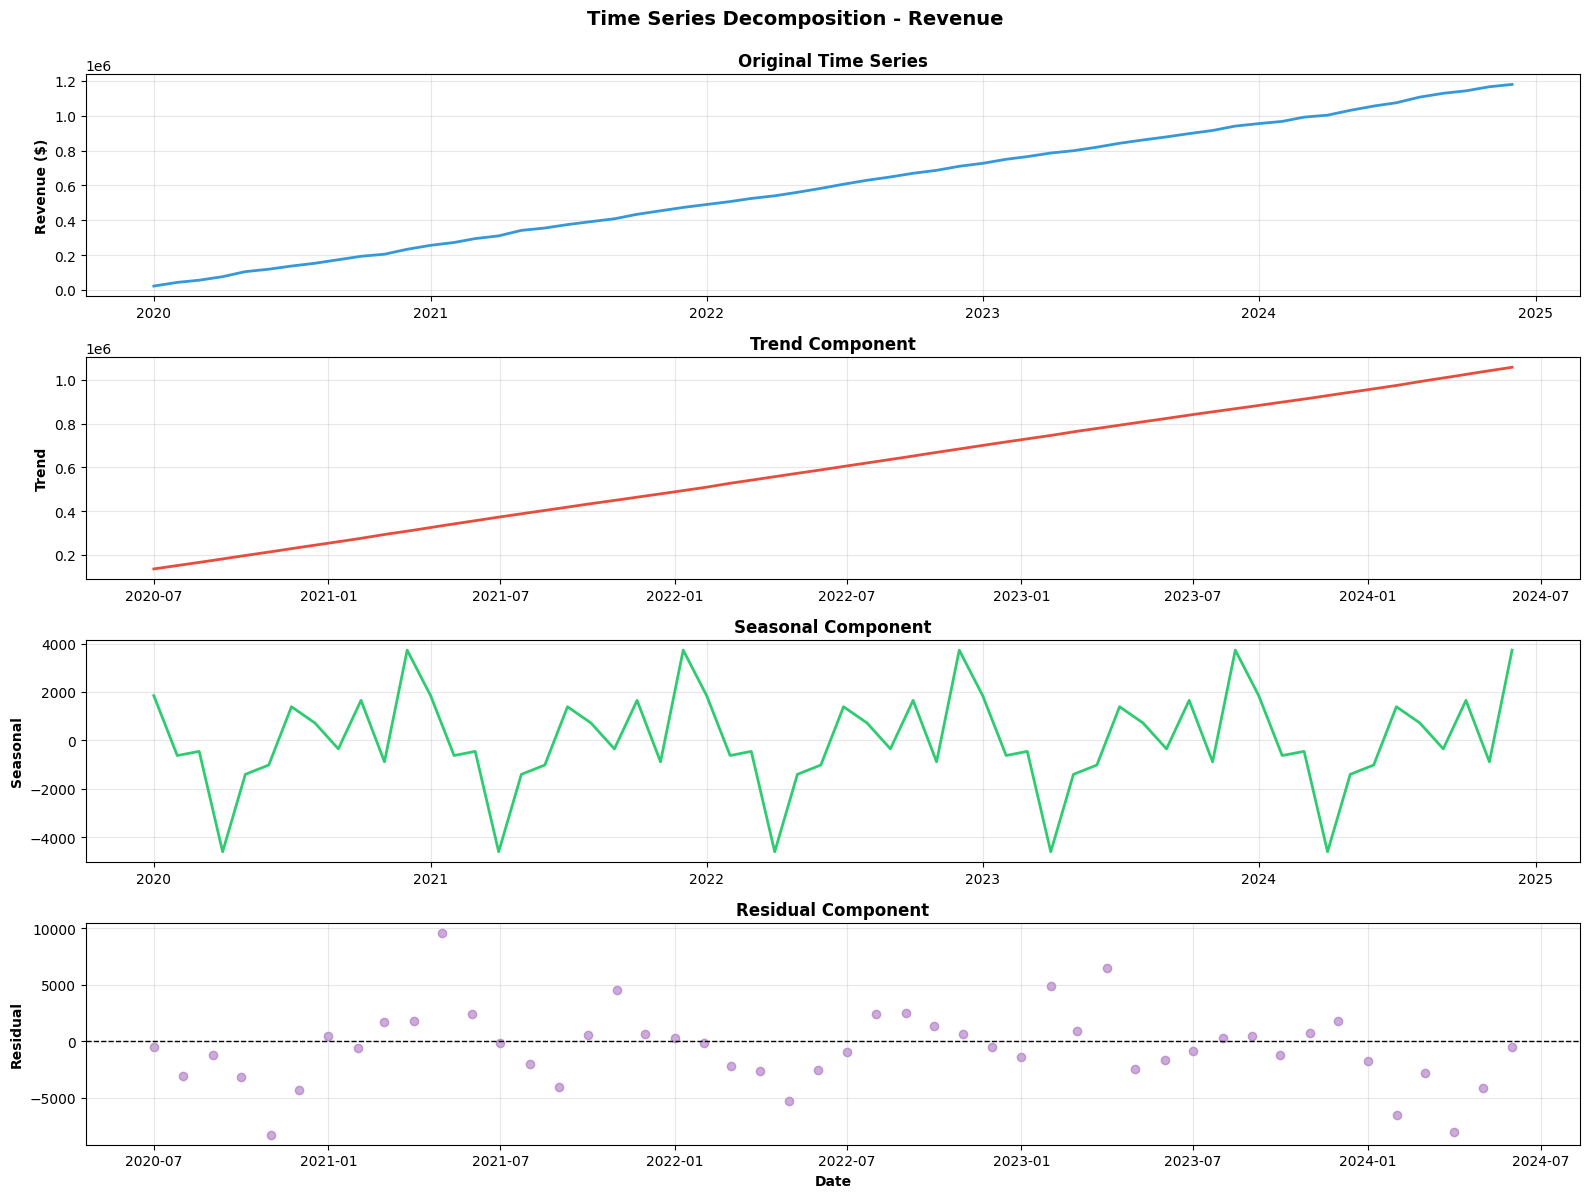


📊 Decomposition Analysis:
   • Seasonal Strength: 0.271 (0=none, 1=perfect)
   • Trend Strength: 1.000
   Weak seasonality - ARIMA may suffice


In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Times Series Decompostion 
print("\nDecomposing time series into:")
print("   • Trend: Long-term progression")
print("   • Seasonality: Repeating patterns")
print("   • Residual: Random fluctuations\n")

# Perform seasonal decomposition
decomposition = seasonal_decompose(ts_data['total_revenue'], 
                                   model='additive', 
                                   period=12)

# Create decomposition plot
fig, axes = plt.subplots(4, 1, figsize=(16, 12))

# Original
axes[0].plot(ts_data.index, ts_data['total_revenue'], linewidth=2, color='#3498db')
axes[0].set_ylabel('Revenue ($)', fontweight='bold')
axes[0].set_title('Original Time Series', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(decomposition.trend.index, decomposition.trend, linewidth=2, color='#e74c3c')
axes[1].set_ylabel('Trend', fontweight='bold')
axes[1].set_title('Trend Component', fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Seasonality
axes[2].plot(decomposition.seasonal.index, decomposition.seasonal, linewidth=2, color='#2ecc71')
axes[2].set_ylabel('Seasonal', fontweight='bold')
axes[2].set_title('Seasonal Component', fontweight='bold', fontsize=12)
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].scatter(decomposition.resid.index, decomposition.resid, alpha=0.5, color='#9b59b6')
axes[3].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[3].set_ylabel('Residual', fontweight='bold')
axes[3].set_xlabel('Date', fontweight='bold')
axes[3].set_title('Residual Component', fontweight='bold', fontsize=12)
axes[3].grid(True, alpha=0.3)

plt.suptitle('Time Series Decomposition - Revenue', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('financial_viz/02_ts_decomposition.png', dpi=300, bbox_inches='tight')
print(" Saved: financial_viz/02_ts_decomposition.png")
plt.show()

# Calculate seasonality strength
seasonal_strength = 1 - (decomposition.resid.var() / (decomposition.seasonal + decomposition.resid).var())
trend_strength = 1 - (decomposition.resid.var() / (decomposition.trend + decomposition.resid).var())

print(f"\n📊 Decomposition Analysis:")
print(f"   • Seasonal Strength: {seasonal_strength:.3f} (0=none, 1=perfect)")
print(f"   • Trend Strength: {trend_strength:.3f}")
if seasonal_strength > 0.6:
    print(f"   Strong seasonality detected - use SARIMA")
else:
    print(f"   Weak seasonality - ARIMA may suffice")

In [41]:
from statsmodels.tsa.stattools import adfuller
#3.3: STATIONARITY TEST
# ========================================================================

print("\n" + "-"*80)
print("3.3: STATIONARITY TESTING (Augmented Dickey-Fuller Test)")
print("-"*80)

print("""
Stationarity is crucial for ARIMA modeling.
A stationary series has:
  • Constant mean over time
  • Constant variance over time
  • No seasonality

ADF Test:
  • H0 (null): Series has a unit root (non-stationary)
  • H1 (alternative): Series is stationary
  • If p-value < 0.05, we reject H0 (series is stationary)
""")

# Perform ADF test
adf_result = adfuller(ts_data['total_revenue'].dropna())

print(f"\nADF Test Results:")
print(f"   • ADF Statistic: {adf_result[0]:.4f}")
print(f"   • P-value: {adf_result[1]:.4f}")
print(f"   • Critical Values:")
for key, value in adf_result[4].items():
    print(f"      - {key}: {value:.4f}")

if adf_result[1] < 0.05:
    print(f"\n   Series is stationary (p < 0.05)")
    differencing_needed = False
else:
    print(f"\n   Series is non-stationary (p >= 0.05)")
    print(f"   → Differencing required for ARIMA modeling")
    differencing_needed = True

# If non-stationary, apply differencing
if differencing_needed:
    ts_data['revenue_diff'] = ts_data['total_revenue'].diff()
    
    # Test differenced series
    adf_diff = adfuller(ts_data['revenue_diff'].dropna())
    print(f"\n   After first differencing:")
    print(f"   • ADF Statistic: {adf_diff[0]:.4f}")
    print(f"   • P-value: {adf_diff[1]:.4f}")
    
    if adf_diff[1] < 0.05:
        print(f"   Differenced series is stationary")


--------------------------------------------------------------------------------
3.3: STATIONARITY TESTING (Augmented Dickey-Fuller Test)
--------------------------------------------------------------------------------

Stationarity is crucial for ARIMA modeling.
A stationary series has:
  • Constant mean over time
  • Constant variance over time
  • No seasonality

ADF Test:
  • H0 (null): Series has a unit root (non-stationary)
  • H1 (alternative): Series is stationary
  • If p-value < 0.05, we reject H0 (series is stationary)


ADF Test Results:
   • ADF Statistic: 0.9980
   • P-value: 0.9942
   • Critical Values:
      - 1%: -3.5553
      - 5%: -2.9157
      - 10%: -2.5957

   Series is non-stationary (p >= 0.05)
   → Differencing required for ARIMA modeling

   After first differencing:
   • ADF Statistic: -4.7060
   • P-value: 0.0001
   Differenced series is stationary



--------------------------------------------------------------------------------
3.4: ACF & PACF ANALYSIS (For ARIMA Parameter Selection)
--------------------------------------------------------------------------------

ACF (Autocorrelation Function):
  • Shows correlation between time series and its lagged values
  • Helps determine MA (Moving Average) order (q)

PACF (Partial Autocorrelation Function):
  • Shows correlation between observations at different lags
  • Helps determine AR (Autoregressive) order (p)


 Saved: financial_viz/03_acf_pacf_analysis.png


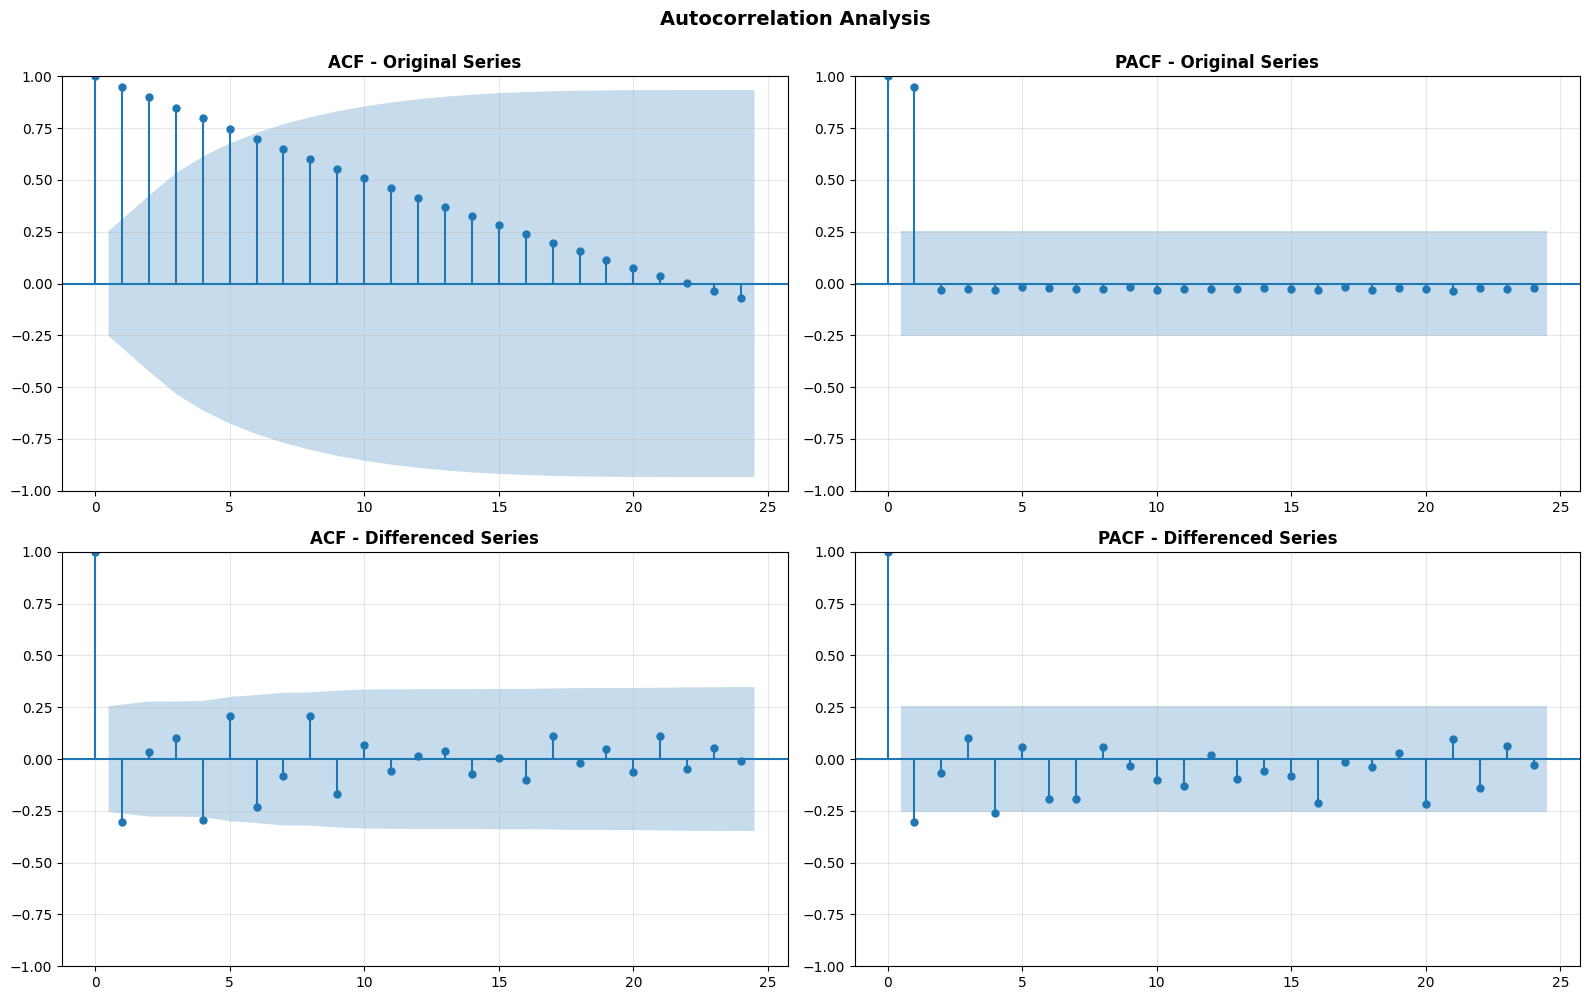

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 3.4: ACF AND PACF ANALYSIS
# ========================================================================

print("\n" + "-"*80)
print("3.4: ACF & PACF ANALYSIS (For ARIMA Parameter Selection)")
print("-"*80)

print("""
ACF (Autocorrelation Function):
  • Shows correlation between time series and its lagged values
  • Helps determine MA (Moving Average) order (q)

PACF (Partial Autocorrelation Function):
  • Shows correlation between observations at different lags
  • Helps determine AR (Autoregressive) order (p)
""")

# Create ACF and PACF plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# ACF - Original
plot_acf(ts_data['total_revenue'].dropna(), lags=24, ax=axes[0, 0])
axes[0, 0].set_title('ACF - Original Series', fontweight='bold', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# PACF - Original
plot_pacf(ts_data['total_revenue'].dropna(), lags=24, ax=axes[0, 1])
axes[0, 1].set_title('PACF - Original Series', fontweight='bold', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# ACF - Differenced (if needed)
if differencing_needed:
    plot_acf(ts_data['revenue_diff'].dropna(), lags=24, ax=axes[1, 0])
    axes[1, 0].set_title('ACF - Differenced Series', fontweight='bold', fontsize=12)
    axes[1, 0].grid(True, alpha=0.3)
    
    plot_pacf(ts_data['revenue_diff'].dropna(), lags=24, ax=axes[1, 1])
    axes[1, 1].set_title('PACF - Differenced Series', fontweight='bold', fontsize=12)
    axes[1, 1].grid(True, alpha=0.3)
else:
    # If stationary, show seasonal patterns
    axes[1, 0].plot(range(1, 13), [ts_data[ts_data.index.month == m]['total_revenue'].mean() 
                                    for m in range(1, 13)], 
                   marker='o', linewidth=2, markersize=8, color='#e74c3c')
    axes[1, 0].set_title('Average Revenue by Month', fontweight='bold', fontsize=12)
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Average Revenue ($)')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_xticks(range(1, 13))
    
    axes[1, 1].boxplot([ts_data[ts_data.index.month == m]['total_revenue'] 
                        for m in range(1, 13)])
    axes[1, 1].set_title('Revenue Distribution by Month', fontweight='bold', fontsize=12)
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Revenue ($)')
    axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Autocorrelation Analysis', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('financial_viz/03_acf_pacf_analysis.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/03_acf_pacf_analysis.png")
plt.show()


In [43]:
from statsmodels.tsa.arima.model import ARIMA
# 3.5: ARIMA MODEL TRAINING
# ========================================================================

print("\n" + "-"*80)
print("3.5: ARIMA MODEL TRAINING")
print("-"*80)

print("""
ARIMA Model Parameters:
  • p: AR (autoregressive) order - based on PACF
  • d: Differencing order - based on stationarity test
  • q: MA (moving average) order - based on ACF

We'll test multiple parameter combinations and select the best model.
""")

# Split data: train on first 80%, test on last 20%
train_size = int(len(ts_data) * 0.8)
train_data = ts_data['total_revenue'][:train_size]
test_data = ts_data['total_revenue'][train_size:]

print(f"\nData Split:")
print(f"   • Training Set: {len(train_data)} periods ({train_data.index.min()} to {train_data.index.max()})")
print(f"   • Test Set: {len(test_data)} periods ({test_data.index.min()} to {test_data.index.max()})")

# Grid search for best ARIMA parameters
print("\n Searching for optimal ARIMA parameters...")
print("Testing combinations of p=[0,1,2], d=[0,1], q=[0,1,2]\n")

best_aic = np.inf
best_params = None
best_model = None

results_list = []

for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(train_data, order=(p, d, q))
                fitted_model = model.fit()
                aic = fitted_model.aic
                results_list.append({'p': p, 'd': d, 'q': q, 'AIC': aic})
                
                if aic < best_aic:
                    best_aic = aic
                    best_params = (p, d, q)
                    best_model = fitted_model
                    
                print(f"   ARIMA({p},{d},{q}) - AIC: {aic:.2f}")
            except Exception as e:
                print(f"   ARIMA({p},{d},{q}) - Failed: {str(e)[:50]}")
                continue

print(f"\n Best Model: ARIMA{best_params} with AIC = {best_aic:.2f}")




--------------------------------------------------------------------------------
3.5: ARIMA MODEL TRAINING
--------------------------------------------------------------------------------

ARIMA Model Parameters:
  • p: AR (autoregressive) order - based on PACF
  • d: Differencing order - based on stationarity test
  • q: MA (moving average) order - based on ACF

We'll test multiple parameter combinations and select the best model.


Data Split:
   • Training Set: 48 periods (2020-01-01 00:00:00 to 2023-12-01 00:00:00)
   • Test Set: 12 periods (2024-01-01 00:00:00 to 2024-12-01 00:00:00)

 Searching for optimal ARIMA parameters...
Testing combinations of p=[0,1,2], d=[0,1], q=[0,1,2]

   ARIMA(0,0,0) - AIC: 1480.10
   ARIMA(0,0,1) - AIC: 1306.00
   ARIMA(0,0,2) - AIC: 1295.17
   ARIMA(0,1,0) - AIC: 1066.29
   ARIMA(0,1,1) - AIC: 1042.10
   ARIMA(0,1,2) - AIC: 1035.13
   ARIMA(1,0,0) - AIC: 1099.16


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


   ARIMA(1,0,1) - AIC: 1064.71
   ARIMA(1,0,2) - AIC: 1031.69
   ARIMA(1,1,0) - AIC: 964.95
   ARIMA(1,1,1) - AIC: 926.58
   ARIMA(1,1,2) - AIC: 922.51
   ARIMA(2,0,0) - AIC: 1001.41
   ARIMA(2,0,1) - AIC: 1091.36


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


   ARIMA(2,0,2) - AIC: 1051.44
   ARIMA(2,1,0) - AIC: 945.41
   ARIMA(2,1,1) - AIC: 923.72
   ARIMA(2,1,2) - AIC: 930.40

 Best Model: ARIMA(1, 1, 2) with AIC = 922.51



--------------------------------------------------------------------------------
MODEL SUMMARY
--------------------------------------------------------------------------------
                               SARIMAX Results                                
Dep. Variable:          total_revenue   No. Observations:                   48
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -457.254
Date:                Thu, 08 Jan 2026   AIC                            922.508
Time:                        20:05:31   BIC                            929.909
Sample:                    01-01-2020   HQIC                           925.293
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   8.07e-06 

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 12-Month Revenue Forecast:

  Month  Forecasted_Revenue    Lower_95%    Upper_95%
2025-01        1.201649e+06 1.192722e+06 1.210576e+06
2025-02        1.221317e+06 1.210310e+06 1.232324e+06
2025-03        1.240985e+06 1.228182e+06 1.253788e+06
2025-04        1.260653e+06 1.246230e+06 1.275076e+06
2025-05        1.280321e+06 1.264402e+06 1.296240e+06
2025-06        1.299989e+06 1.282664e+06 1.317314e+06
2025-07        1.319657e+06 1.300997e+06 1.338317e+06
2025-08        1.339325e+06 1.319387e+06 1.359264e+06
2025-09        1.358993e+06 1.337822e+06 1.380165e+06
2025-10        1.378662e+06 1.356296e+06 1.401027e+06
2025-11        1.398330e+06 1.374803e+06 1.421857e+06
2025-12        1.417998e+06 1.393337e+06 1.442658e+06

 Summary Statistics:
   • Total Forecasted Revenue (12 months): $15,717,879.04
   • Average Monthly Revenue: $1,309,823.25
   • Expected Growth from Last Month: $21,273.22

 Saved: financial_viz/04_arima_forecast.png


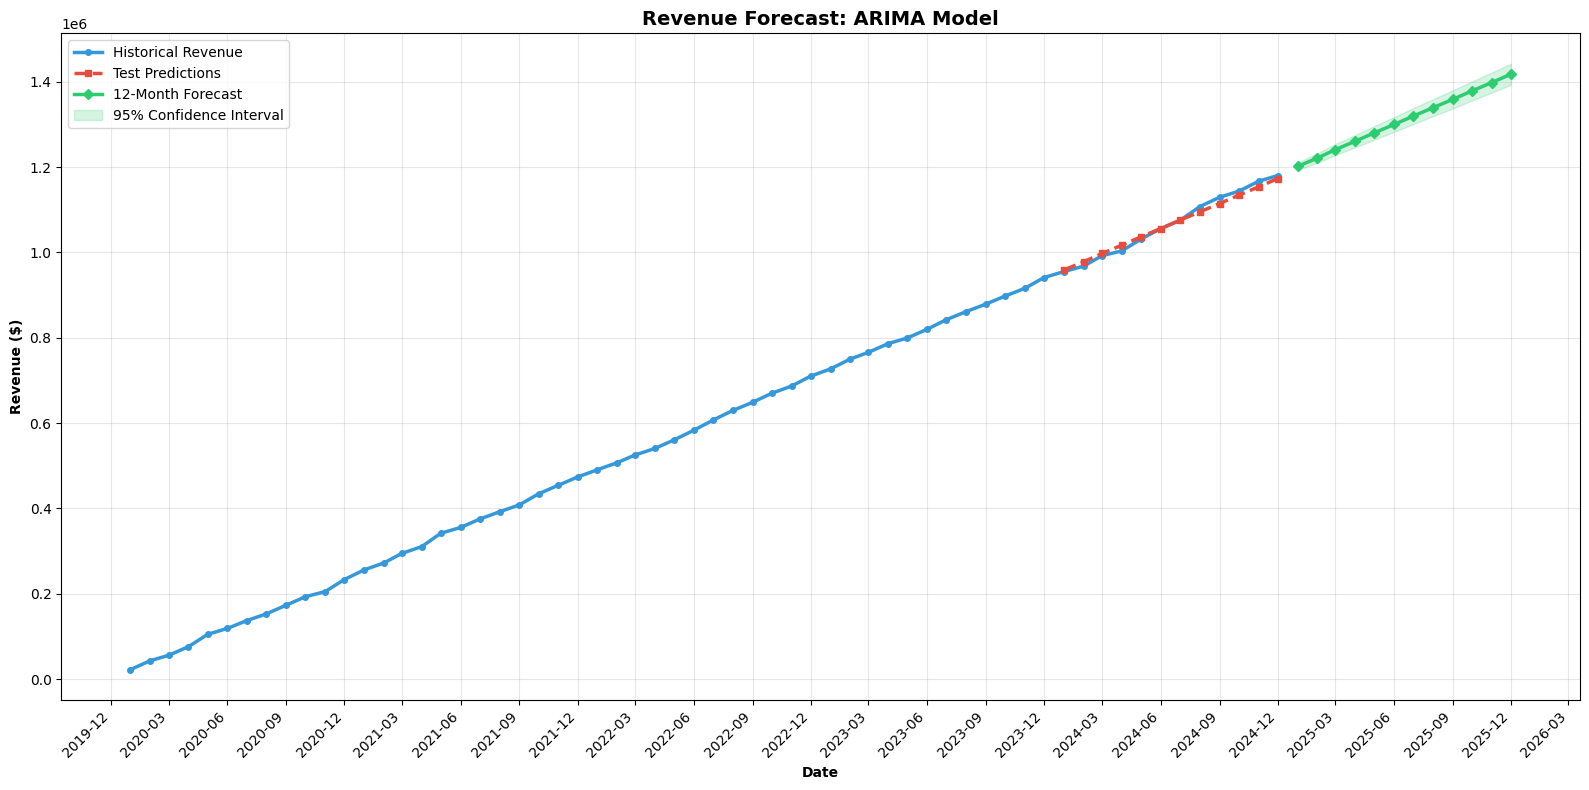


--------------------------------------------------------------------------------
MODEL SUMMARY
--------------------------------------------------------------------------------
                               SARIMAX Results                                
Dep. Variable:          total_revenue   No. Observations:                   48
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -457.254
Date:                Thu, 08 Jan 2026   AIC                            922.508
Time:                        20:05:33   BIC                            929.909
Sample:                    01-01-2020   HQIC                           925.293
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   8.07e-06 

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Display model summary
print("\n" + "-"*80)
print("MODEL SUMMARY")
print("-"*80)
print(best_model.summary())

# Make predictions on test set
predictions = best_model.forecast(steps=len(test_data))

# Calculate error metrics
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

print("\n" + "-"*80)
print("MODEL PERFORMANCE ON TEST SET")
print("-"*80)
print(f"   • MAE (Mean Absolute Error): ${mae:,.2f}")
print(f"   • RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"   • MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

# ========================================================================
# 3.6: FUTURE FORECASTING
# ========================================================================

print("\n" + "-"*80)
print("3.6: REVENUE FORECASTING - NEXT 12 MONTHS")
print("-"*80)

# Refit model on full dataset
final_model = ARIMA(ts_data['total_revenue'], order=best_params)
final_fitted = final_model.fit()

# Forecast next 12 months
forecast_periods = 12
forecast = final_fitted.forecast(steps=forecast_periods)
forecast_index = pd.date_range(start=ts_data.index.max() + pd.DateOffset(months=1), 
                                periods=forecast_periods, 
                                freq='MS')

# Get confidence intervals
forecast_df = final_fitted.get_forecast(steps=forecast_periods)
forecast_ci = forecast_df.conf_int()

print(f"\n 12-Month Revenue Forecast:\n")
forecast_summary = pd.DataFrame({
    'Month': forecast_index.strftime('%Y-%m'),
    'Forecasted_Revenue': forecast.values,
    'Lower_95%': forecast_ci.iloc[:, 0].values,
    'Upper_95%': forecast_ci.iloc[:, 1].values
})
print(forecast_summary.to_string(index=False))

print(f"\n Summary Statistics:")
print(f"   • Total Forecasted Revenue (12 months): ${forecast.sum():,.2f}")
print(f"   • Average Monthly Revenue: ${forecast.mean():,.2f}")
print(f"   • Expected Growth from Last Month: ${(forecast.iloc[0] - ts_data['total_revenue'].iloc[-1]):,.2f}")

# Visualize forecast
fig, ax = plt.subplots(figsize=(16, 8))

# Historical data
ax.plot(ts_data.index, ts_data['total_revenue'], 
        linewidth=2.5, color='#3498db', label='Historical Revenue', marker='o', markersize=4)

# Test set predictions (if we want to show validation)
ax.plot(test_data.index, predictions, 
        linewidth=2.5, color='#e74c3c', label='Test Predictions', 
        marker='s', markersize=4, linestyle='--')

# Future forecast
ax.plot(forecast_index, forecast, 
        linewidth=2.5, color='#2ecc71', label='12-Month Forecast', 
        marker='D', markersize=5)

# Confidence interval
ax.fill_between(forecast_index, 
                forecast_ci.iloc[:, 0], 
                forecast_ci.iloc[:, 1], 
                color='#2ecc71', alpha=0.2, label='95% Confidence Interval')

ax.set_title('Revenue Forecast: ARIMA Model', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontweight='bold')
ax.set_ylabel('Revenue ($)', fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('financial_viz/04_arima_forecast.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/04_arima_forecast.png")
plt.show()


# Display model summary
print("\n" + "-"*80)
print("MODEL SUMMARY")
print("-"*80)
print(best_model.summary())

# Make predictions on test set
predictions = best_model.forecast(steps=len(test_data))

# Calculate error metrics
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

print("\n" + "-"*80)
print("MODEL PERFORMANCE ON TEST SET")
print("-"*80)
print(f"   • MAE (Mean Absolute Error): ${mae:,.2f}")
print(f"   • RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"   • MAPE (Mean Absolute Percentage Error): {mape:.2f}%")



In [45]:
finan_cust[['total_revenue','mrr','usage_score','number_of_users',
           'support_tickets','lifetime_months']].corr()


,total_revenue,mrr,usage_score,number_of_users,support_tickets,lifetime_months
total_revenue,1.000000,0.737228,0.034230,-0.000100,0.026642,0.439398
mrr,0.737228,1.000000,0.003778,0.002396,0.024979,-0.027749
usage_score,0.034230,0.003778,1.000000,0.014914,0.003715,0.083027
number_of_users,-0.000100,0.002396,0.014914,1.000000,0.015314,0.015328
support_tickets,0.026642,0.024979,0.003715,0.015314,1.000000,-0.005751
lifetime_months,0.439398,-0.027749,0.083027,0.015328,-0.005751,1.000000


In [46]:
monthly_revenue.head(10)


,year_month,total_revenue,num_transactions,avg_transaction,unique_customers,revenue_growth,month,quarter,is_q4
0,2020-01-01,21878.65,97,225.553093,97,NaN,1,1,0
1,2020-02-01,42934.00,173,248.173410,173,96.236971,2,1,0
2,2020-03-01,55509.00,239,232.255230,239,29.289141,3,1,0
3,2020-04-01,75856.80,314,241.582166,314,36.656758,4,2,0
4,2020-05-01,104698.22,409,255.985868,409,38.020876,5,2,0
5,2020-06-01,118719.53,479,247.848706,479,13.392119,6,2,0
6,2020-07-01,136785.25,560,244.259375,560,15.217142,7,3,0
7,2020-08-01,152817.37,639,239.150814,639,11.720650,8,3,0
8,2020-09-01,173125.54,714,242.472745,714,13.289176,9,3,0
9,2020-10-01,192940.47,784,246.097538,784,11.445411,10,4,1


In [47]:
monthly_revenue['year_month'] = pd.to_datetime(monthly_revenue['year_month'])
expected_periods = pd.date_range(
    start=ts_data.index.min(),
    end=ts_data.index.max(),
    freq='MS'
)
expected_periods

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
      

In [ ]:
total_months = monthly_revenue['year_month'].dt.to_period('M').nunique()
print("Total months of data:", total_months)

Total months of data: 60


## Churn Prediction

In [48]:
# =========================================
# CUSTOMER CHURN ANALYSIS (SLIGHTLY ADVANCED)
# =========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

print("CUSTOMER CHURN ANALYSIS")

# -----------------------------------------
# 1. BASIC CHURN METRICS
# -----------------------------------------

total_customers = len(customers)
churned_customers = customers['is_churned'].sum()
churn_rate = churned_customers / total_customers * 100

print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Overall Churn Rate: {churn_rate:.2f}%")



CUSTOMER CHURN ANALYSIS
Total Customers: 5000
Churned Customers: 656.0
Overall Churn Rate: 13.12%


In [ ]:
# -----------------------------------------
# 2. CHURN BY SEGMENT
# -----------------------------------------

churn_by_segment = customers.groupby('segment')['is_churned'].mean() * 100
print("\nChurn Rate by Segment:")
print(churn_by_segment)


Churn Rate by Segment:
segment
Enterprise        13.255361
Mid-Market        13.672496
Small Business    12.694431
Startup           13.187702
Name: is_churned, dtype: float64


In [50]:
# -----------------------------------------
# 3. FINANCIAL IMPACT OF CHURN
# -----------------------------------------

lost_mrr = customers.loc[customers['is_churned'] == 1, 'mrr'].sum()
print("\nFinancial Impact:")
print(f"Lost Monthly Revenue: ${lost_mrr:,.2f}")
print(f"Annual Revenue Loss: ${lost_mrr * 12:,.2f}")

# Create churn modeling dataset
churn_model_data = finan_cust.copy()

# -----------------------------------------
# FEATURE ENGINEERING
# -----------------------------------------

# Tickets per month (handle division safely)
churn_model_data['tickets_per_month'] = (
    churn_model_data['support_tickets'] / churn_model_data['lifetime_months']
)

# Replace infinity (division by zero) with NaN
churn_model_data['tickets_per_month'] = churn_model_data['tickets_per_month'] \
    .replace([np.inf, -np.inf], np.nan)

# Low usage flag
churn_model_data['low_usage'] = (churn_model_data['usage_score'] < 40).astype(int)

# Select features for churn prediction
features = [
    'mrr',
    'usage_score',
    'support_tickets',
    'tickets_per_month',
    'contract_length',
    'low_usage'
]

# Prepare X (inputs) and y (target)
X = churn_model_data[features].fillna(churn_model_data[features].median())
y = churn_model_data['is_churned']





Financial Impact:
Lost Monthly Revenue: $167,044.00
Annual Revenue Loss: $2,004,528.00


In [51]:
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())


In [52]:
# -----------------------------------------
# 5. TRAIN-TEST SPLIT
# -----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------------------
# 6. FEATURE SCALING
# -----------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [53]:
# -----------------------------------------
# 7. TRAIN MODELS
# -----------------------------------------
# Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]

# Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

print("\nMODEL PERFORMANCE")

print("\nLogistic Regression:")
print(classification_report(y_test, lr_preds))
print("ROC AUC:", roc_auc_score(y_test, lr_probs))

print("\nRandom Forest:")
print(classification_report(y_test, rf_preds))
print("ROC AUC:", roc_auc_score(y_test, rf_probs))

# -----------------------------------------
# 8. CUSTOMER RISK SCORING (CORRECT)
# -----------------------------------------

# Predict churn probability using Random Forest
churn_model_data['churn_probability'] = rf.predict_proba(X)[:, 1]

# Create risk categories
churn_model_data['risk_level'] = pd.cut(
    churn_model_data['churn_probability'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

print("\nCustomer Risk Distribution:")
print(churn_model_data['risk_level'].value_counts())



MODEL PERFORMANCE

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.92      0.58      0.71       869
         1.0       0.19      0.66      0.30       131

    accuracy                           0.59      1000
   macro avg       0.56      0.62      0.51      1000
weighted avg       0.83      0.59      0.66      1000

ROC AUC: 0.6673986946477043

Random Forest:
              precision    recall  f1-score   support

         0.0       0.94      0.80      0.87       869
         1.0       0.34      0.67      0.45       131

    accuracy                           0.78      1000
   macro avg       0.64      0.74      0.66      1000
weighted avg       0.86      0.78      0.81      1000

ROC AUC: 0.8291622378973813

Customer Risk Distribution:
risk_level
Low Risk       2769
Medium Risk    1307
High Risk       924
Name: count, dtype: int64


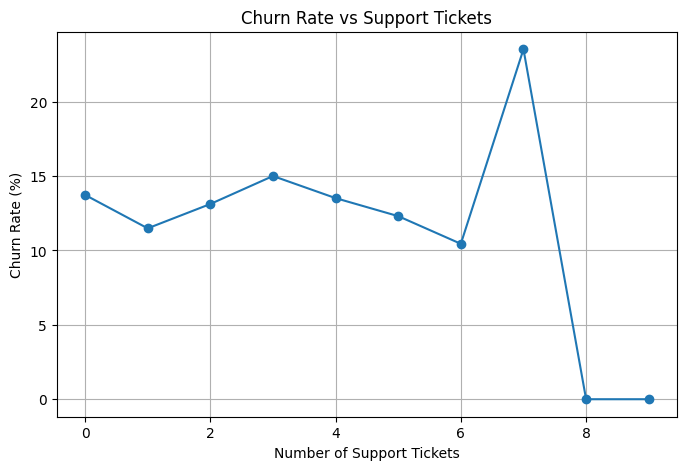

In [54]:
import matplotlib.pyplot as plt

# Calculate churn rate by number of support tickets
churn_by_tickets = (
    churn_model_data
    .groupby('support_tickets')['is_churned']
    .mean() * 100
)

plt.figure(figsize=(8, 5))
plt.plot(churn_by_tickets.index, churn_by_tickets.values, marker='o')
plt.xlabel('Number of Support Tickets')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate vs Support Tickets')
plt.grid(True)
plt.show()



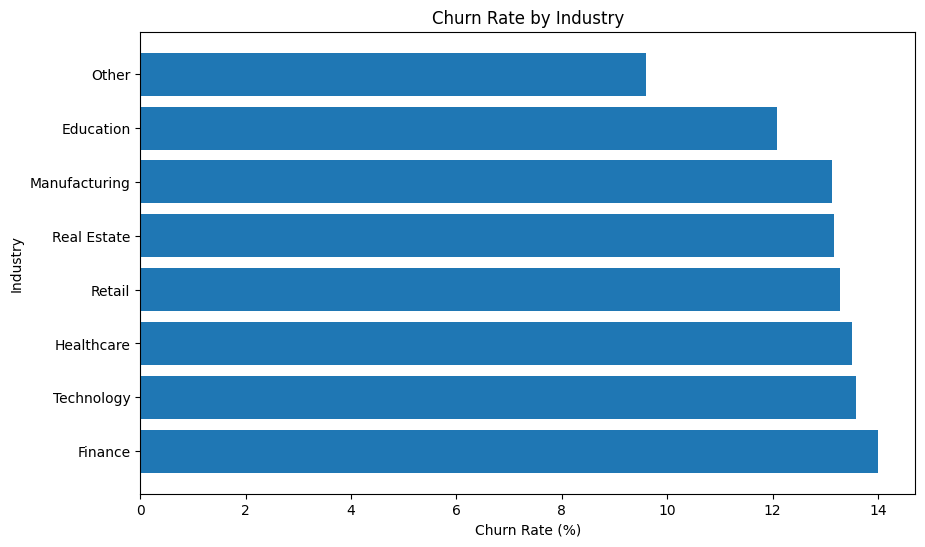

In [55]:
# Calculate churn rate by industry
import matplotlib.pyplot as plt

# Churn rate by industry
churn_by_industry = (
    churn_model_data
    .groupby('industry')['is_churned']
    .mean() * 100
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(churn_by_industry.index, churn_by_industry.values)
plt.xlabel('Churn Rate (%)')
plt.ylabel('Industry')
plt.title('Churn Rate by Industry')

plt.show()



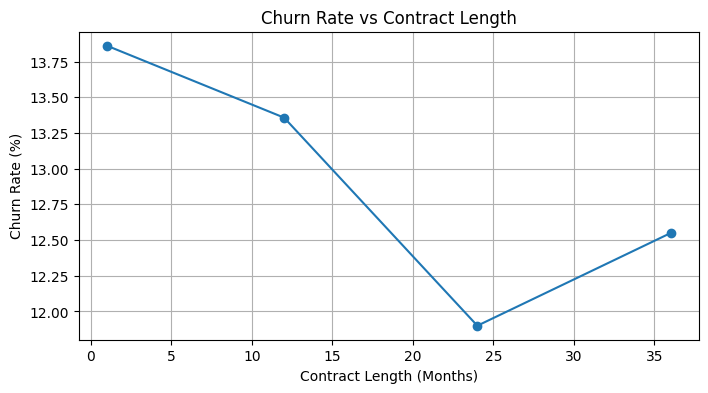

In [108]:
# Churn Rate by Contract Length
churn_by_contract = customers.groupby('contract_length')['is_churned'].mean() * 100

plt.figure(figsize=(8,4))
plt.plot(churn_by_contract.index, churn_by_contract.values, marker='o')
plt.title('Churn Rate vs Contract Length')
plt.xlabel('Contract Length (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()


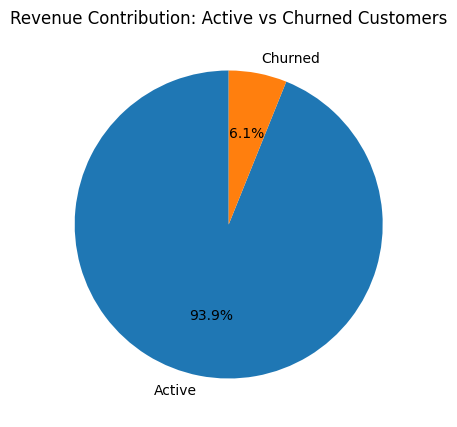

In [109]:
#Revenue Contribution: Churned vs Active Customers
revenue_split = customers.groupby('is_churned')['total_revenue'].sum()
revenue_split.index = ['Active', 'Churned']

plt.figure(figsize=(5,5))
plt.pie(
    revenue_split.values,
    labels=revenue_split.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Revenue Contribution: Active vs Churned Customers')
plt.show()


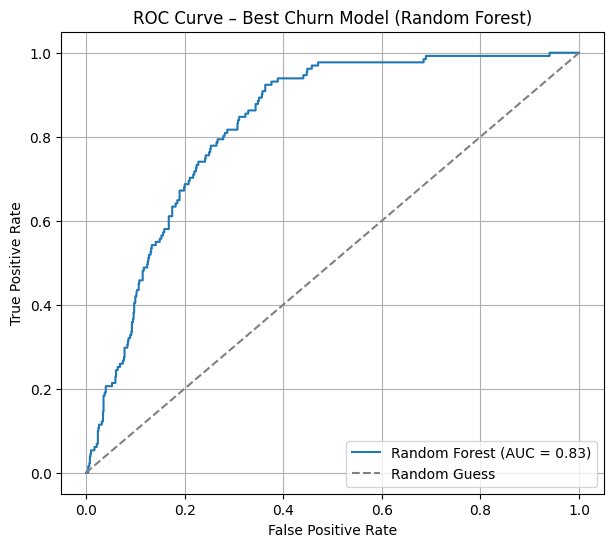

In [56]:
# As Random Forest Graph is better than
from sklearn.metrics import roc_curve, auc

# Predicted probabilities from Random Forest
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Best Churn Model (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()




<Figure size 600x500 with 0 Axes>

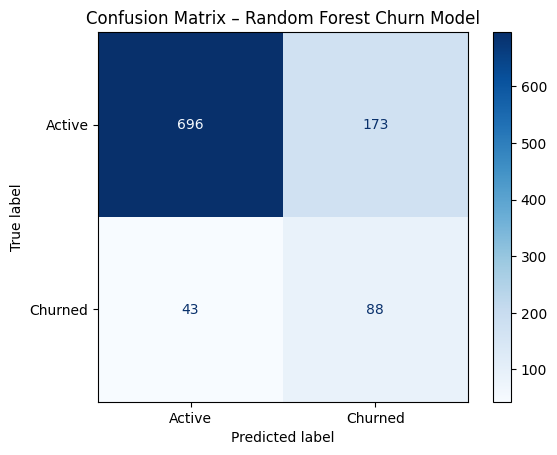

Confusion Matrix Values:
True Negatives (TN): 696
False Positives (FP): 173
False Negatives (FN): 43
True Positives (TP): 88


In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Active', 'Churned']
)

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix – Random Forest Churn Model')
plt.grid(False)
plt.show()

# Extract values
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix Values:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


In [58]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_10_features = feature_importance.head(10)

print("Top 10 Most Important Features for Churn Prediction:\n")
print(top_10_features.to_string(index=False))



Top 10 Most Important Features for Churn Prediction:

          Feature  Importance
tickets_per_month    0.464326
      usage_score    0.276541
  support_tickets    0.144985
  contract_length    0.047456
              mrr    0.046512
        low_usage    0.020181


In [59]:
# =========================================
# TOP 50 CUSTOMERS MOST LIKELY TO CHURN
# =========================================

import pandas as pd
import numpy as np

# 1. Create modeling dataset (safe copy)
churn_model_data = finan_cust.copy()

# -----------------------------------------
# 2. FEATURE ENGINEERING (minimal & clean)
# -----------------------------------------

# Tickets per month (handle division safely)
churn_model_data['tickets_per_month'] = (
    churn_model_data['support_tickets'] / churn_model_data['lifetime_months']
)

churn_model_data['tickets_per_month'] = (
    churn_model_data['tickets_per_month']
    .replace([np.inf, -np.inf], np.nan)
)

# Low usage flag
churn_model_data['low_usage'] = (churn_model_data['usage_score'] < 40).astype(int)

# -----------------------------------------
# 3. SELECT FEATURES (same as model training)
# -----------------------------------------

features = [
    'mrr',
    'usage_score',
    'support_tickets',
    'tickets_per_month',
    'contract_length',
    'low_usage'
]

X = churn_model_data[features].fillna(churn_model_data[features].median())

# -----------------------------------------
# 4. PREDICT CHURN PROBABILITY (Random Forest)
# -----------------------------------------

churn_model_data['churn_probability'] = rf.predict_proba(X)[:, 1]

# -----------------------------------------
# 5. RISK CATEGORIZATION
# -----------------------------------------

churn_model_data['risk_level'] = pd.cut(
    churn_model_data['churn_probability'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

# -----------------------------------------
# 6. TOP 50 HIGHEST RISK CUSTOMERS
# -----------------------------------------

top_50_churn_risk = churn_model_data.nlargest(50, 'churn_probability')[[
    'customer_id',
    'segment',
    'industry',
    'plan',
    'mrr',
    'usage_score',
    'nps_score',
    'support_tickets',
    'churn_probability',
    'risk_level'
]]

print("\nTop 50 Customers Most Likely to Churn:\n")
print(top_50_churn_risk.to_string(index=False))

# -----------------------------------------
# 7. EXPORT FOR BUSINESS USE
# -----------------------------------------

top_50_churn_risk.to_csv('top_50_high_risk_customers.csv', index=False)

print("\nSaved file: top_50_high_risk_customers.csv")




Top 50 Customers Most Likely to Churn:

customer_id        segment      industry         plan  mrr  usage_score  nps_score  support_tickets  churn_probability risk_level
CUST_003088        Startup       Finance        Basic   49           21         45                3           0.889688  High Risk
CUST_002920     Mid-Market     Education        Basic   49           33         15                2           0.880416  High Risk
CUST_003382     Mid-Market        Retail        Basic   49           20         55                2           0.880122  High Risk
CUST_002056 Small Business Manufacturing Professional  149           15         48                3           0.878149  High Risk
CUST_002175 Small Business    Healthcare        Basic   49           28         -7                2           0.870265  High Risk
CUST_001244 Small Business Manufacturing        Basic   49           25        -10                2           0.868895  High Risk
CUST_004407        Startup    Technology        B

In [60]:
finan_trans=pd.read_csv('financial_transactions.csv')
finan_trans.head()

,transaction_id,customer_id,transaction_date,amount,transaction_type,status,payment_method,year_month,cohort_month,transaction_month
0,CUST_000001_TXN_0001,CUST_000001,2023-01-31,52.78,New,Completed,Credit Card,2023-01,2023-01,2023-01
1,CUST_000001_TXN_0002,CUST_000001,2023-02-28,52.87,Subscription,Completed,Credit Card,2023-02,2023-01,2023-02
2,CUST_000001_TXN_0003,CUST_000001,2023-03-28,52.84,Subscription,Completed,Credit Card,2023-03,2023-01,2023-03
3,CUST_000001_TXN_0004,CUST_000001,2023-04-28,53.22,Subscription,Completed,Credit Card,2023-04,2023-01,2023-04
4,CUST_000001_TXN_0005,CUST_000001,2023-05-28,51.86,Subscription,Completed,Wire Transfer,2023-05,2023-01,2023-05


## RFM Retention Analysis

In [67]:
# Only active customers
rfm = finan_cust[finan_cust['is_churned'] == 0].copy()

rfm['Recency'] = rfm['recency_days']
rfm['Frequency'] = rfm['transaction_count']
rfm['Monetary'] = rfm['total_revenue']

print("RFM Sample:")
print(rfm[['customer_id', 'Recency', 'Frequency', 'Monetary']].head())



RFM Sample:
   customer_id  Recency  Frequency  Monetary
0  CUST_000001        3         24   1194.63
1  CUST_000002        2         13    676.89
3  CUST_000004       13         18   7107.69
4  CUST_000005       27         23   9839.84
5  CUST_000006        3         25   1249.22


## Customer Segmentation

In [91]:
def simple_segment(row):
    # Highest priority: At Risk
    if row['Recency'] > 60 or row['Frequency'] <= 2:
        return 'At Risk'
    elif row['Recency'] < 30 and row['Frequency'] > 5:
        return 'Loyal'
    else:
        return 'Regular'

rfm['customer_segment'] = rfm.apply(simple_segment, axis=1)

print(rfm['customer_segment'].value_counts())


customer_segment
Loyal      3751
Regular     439
At Risk     154
Name: count, dtype: int64


In [92]:
rfm['risk_flag'] = (
    (rfm['Recency'] > 60) |
    (rfm['Frequency'] <= 2)
)


In [93]:
rfm.head()

,customer_id,signup_date,segment,industry,country,plan,mrr,contract_length,number_of_users,support_tickets,...,avg_transaction_value,cohort_month,cohort_year,payback_months,ml_cluster,Recency,Frequency,Monetary,customer_segment,risk_flag
0,CUST_000001,2023-01-31,Startup,Healthcare,Other,Basic,49,24,3,2,...,49.776250,2023-01,2023,24.38,0.0,3,24,1194.63,Loyal,False
1,CUST_000002,2023-12-30,Startup,Retail,USA,Basic,49,12,4,1,...,52.068462,2023-12,2023,13.81,2.0,2,13,676.89,Loyal,False
3,CUST_000004,2023-07-18,Startup,Retail,USA,Business,399,1,1,3,...,394.871667,2023-07,2023,17.81,3.0,13,18,7107.69,Loyal,False
4,CUST_000005,2023-02-04,Startup,Technology,USA,Business,399,12,2,0,...,427.819130,2023-02,2023,24.66,3.0,27,23,9839.84,Loyal,False
5,CUST_000006,2022-12-31,Small Business,Retail,UK,Basic,49,12,6,1,...,49.968800,2022-12,2022,25.49,2.0,3,25,1249.22,Loyal,False


In [94]:
risk_customers = rfm[rfm['risk_flag'] == True]

print("Total Risk Customers:", len(risk_customers))
print(risk_customers.head())


Total Risk Customers: 154
     customer_id signup_date         segment    industry country  \
46   CUST_000047  2024-12-11  Small Business  Healthcare   Other   
90   CUST_000091  2024-11-30  Small Business  Technology     USA   
111  CUST_000112  2024-11-07         Startup      Retail      UK   
139  CUST_000140  2024-12-01         Startup   Education      UK   
165  CUST_000166  2024-11-27         Startup   Education   Other   

             plan  mrr  contract_length  number_of_users  support_tickets  \
46   Professional  149                1                4                5   
90          Basic   49               24                4                4   
111         Basic   49               12                3                0   
139  Professional  149               36                1                4   
165         Basic   49               12                1                1   

     ...  avg_transaction_value  cohort_month cohort_year  payback_months  \
46   ...                1

## CLV

In [95]:
# CLV by segment
clv_summary = finan_cust.groupby('segment')['clv'].mean()

print("Average CLV by Segment:")
print(clv_summary)


Average CLV by Segment:
segment
Enterprise        7010.627524
Mid-Market        7477.639014
Small Business    7098.991756
Startup           7024.722638
Name: clv, dtype: float64


In [77]:
finan_cust.head()

,customer_id,signup_date,segment,industry,country,plan,mrr,contract_length,number_of_users,support_tickets,...,total_revenue,clv,last_transaction_date,recency_days,transaction_count,avg_transaction_value,cohort_month,cohort_year,payback_months,ml_cluster
0,CUST_000001,2023-01-31,Startup,Healthcare,Other,Basic,49,24,3,2,...,1194.63,1194.63,2024-12-28,3,24,49.776250,2023-01,2023,24.38,0.0
1,CUST_000002,2023-12-30,Startup,Retail,USA,Basic,49,12,4,1,...,676.89,676.89,2024-12-29,2,13,52.068462,2023-12,2023,13.81,2.0
2,CUST_000003,2022-05-10,Small Business,Retail,Other,Professional,149,12,8,1,...,3470.20,3470.20,2024-03-10,296,23,150.878261,2022-05,2022,23.29,2.0
3,CUST_000004,2023-07-18,Startup,Retail,USA,Business,399,1,1,3,...,7107.69,7107.69,2024-12-18,13,18,394.871667,2023-07,2023,17.81,3.0
4,CUST_000005,2023-02-04,Startup,Technology,USA,Business,399,12,2,0,...,9839.84,9839.84,2024-12-04,27,23,427.819130,2023-02,2023,24.66,3.0


In [96]:
# CLV by RFM segment
# Customer Lifetime Value (CLV) by RFM Segment
segment_summary = rfm.groupby('customer_segment')['total_revenue'].agg(
    Customer_Count='count',
    Average_CLV='mean',
    Total_CLV='sum'
)

print(segment_summary.round(2))



                  Customer_Count  Average_CLV    Total_CLV
customer_segment                                          
At Risk                      154       433.60     66773.66
Loyal                       3751      8459.85  31732883.25
Regular                      439      4213.49   1849720.27


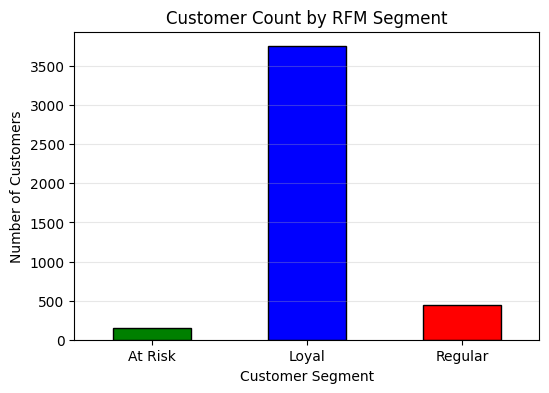

In [97]:
segment_summary['Customer_Count'].plot(
    kind='bar',
    color=['green', 'blue', 'red'],
    figsize=(6,4),
    edgecolor='black'
)

plt.title('Customer Count by RFM Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()


In [98]:
segment_summary.head()

,Customer_Count,Average_CLV,Total_CLV
customer_segment,,,
At Risk,154,433.595195,66773.66
Loyal,3751,8459.846241,31732883.25
Regular,439,4213.485809,1849720.27


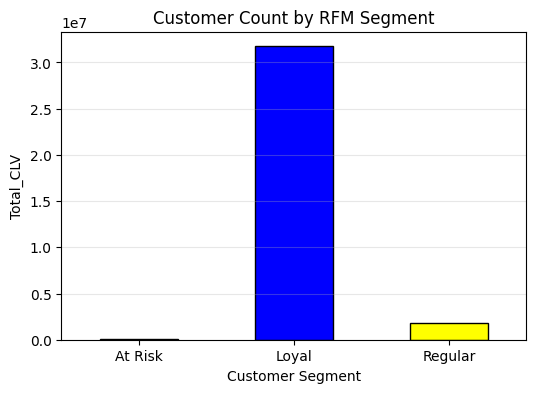

In [102]:
segment_summary['Total_CLV'].plot(
    kind='bar',
    color=['green', 'blue', 'yellow'],
    figsize=(6,4),
    edgecolor='black'
)

plt.title('Customer Count by RFM Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total_CLV')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

## CUSTOMER SEGMENT PROFITABILITY

In [103]:
# Segment-wise profitability
segment_profit = customers.groupby('segment').agg({
    'customer_id': 'count',
    'total_revenue': 'sum',
    'clv': 'mean',
    'is_churned': 'mean'
})

segment_profit.columns = [
    'Customer_Count',
    'Total_Revenue',
    'Average_CLV',
    'Churn_Rate'
]

segment_profit['Churn_Rate'] = segment_profit['Churn_Rate'] * 100

print(segment_profit.round(2))


                Customer_Count  Total_Revenue  Average_CLV  Churn_Rate
segment                                                               
Enterprise                 513     3596451.92      7010.63       13.26
Mid-Market                1258     9406869.88      7477.64       13.67
Small Business            1993    14148290.57      7098.99       12.69
Startup                   1236     8682557.18      7024.72       13.19


In [104]:
# Plan-wise analysis
plan_summary = customers.groupby('plan').agg({
    'customer_id': 'count',
    'total_revenue': 'sum',
    'clv': 'mean',
    'is_churned': 'mean'
})

plan_summary.columns = [
    'Customer_Count',
    'Total_Revenue',
    'Average_CLV',
    'Churn_Rate'
]

plan_summary['Churn_Rate'] = plan_summary['Churn_Rate'] * 100

print(plan_summary.round(2))


              Customer_Count  Total_Revenue  Average_CLV  Churn_Rate
plan                                                                
Basic                   1785     2411738.18      1351.11       14.85
Business                1240    13661159.10     11017.06       12.26
Enterprise               531    13739327.16     25874.44       12.81
Professional            1444     6021945.11      4170.32       11.84


## K means Clustering

In [107]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = [
    'mrr',
    'lifetime_months',
    'usage_score',
    'support_tickets'
]

cluster_data = customers[features].fillna(0)


features = [
    'mrr',
    'lifetime_months',
    'usage_score',
    'support_tickets'
]

cluster_data = customers[features].fillna(0)
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)
kmeans = KMeans(n_clusters=3, random_state=42)
customers['cluster'] = kmeans.fit_predict(cluster_scaled)
cluster_summary = customers.groupby('cluster').agg({
    'customer_id': 'count',
    'mrr': 'mean',
    'usage_score': 'mean',
    'support_tickets': 'mean'
})

print(cluster_summary.round(2))




         customer_id     mrr  usage_score  support_tickets
cluster                                                   
0               1697  236.98        68.46             1.71
1               1380  348.35        62.99             3.69
2               1923  231.40        62.09             1.11


In [112]:
## Summary Dashboard
# ================================
#  KPI SUMMARY
# ================================

import pandas as pd

print("\n" + "="*60)
print("KEY BUSINESS METRICS SUMMARY")
print("="*60)

# -------------------------------
# 1. CUSTOMER METRICS
# -------------------------------

total_customers = len(finan_cust)
active_customers = finan_cust[finan_cust['is_churned'] == 0].shape[0]
churned_customers = finan_cust[finan_cust['is_churned'] == 1].shape[0]

churn_rate = churned_customers / total_customers * 100

# -------------------------------
# 2. REVENUE METRICS
# -------------------------------

# Monthly Recurring Revenue (only active customers)
total_mrr = finan_cust[finan_cust['is_churned'] == 0]['mrr'].sum()

# Annual Recurring Revenue
total_arr = total_mrr * 12

# Total revenue earned till date
total_revenue = finan_cust['total_revenue'].sum()

# Average revenue per customer
avg_revenue_per_customer = finan_cust['total_revenue'].mean()

# -------------------------------
# 3. CUSTOMER VALUE METRICS
# -------------------------------

avg_clv = finan_cust['clv'].mean()
median_clv = finan_cust['clv'].median()

avg_lifetime = finan_cust['lifetime_months'].mean()

# -------------------------------
# 4. RISK METRICS (from churn model)
# -------------------------------
# Customers with churn probability > 50%
at_risk_customers = churn_model_data[churn_model_data['churn_probability'] > 0.5]

# Number of risky customers
at_risk_count = len(at_risk_customers)

# Revenue at risk (monthly)
at_risk_mrr = at_risk_customers['mrr'].sum()


# -------------------------------
# 5. PRINT KPI SUMMARY
# -------------------------------

print(f"""
CUSTOMER METRICS
----------------
Total Customers        : {total_customers}
Active Customers       : {active_customers}
Churned Customers      : {churned_customers}
Churn Rate (%)         : {churn_rate:.2f}

REVENUE METRICS
---------------
Monthly MRR ($)        : {total_mrr:,.2f}
Annual ARR ($)         : {total_arr:,.2f}
Total Revenue ($)      : {total_revenue:,.2f}
Avg Revenue / Customer : {avg_revenue_per_customer:,.2f}

CUSTOMER VALUE
--------------
Average CLV ($)        : {avg_clv:,.2f}
Median CLV ($)         : {median_clv:,.2f}
Avg Lifetime (months)  : {avg_lifetime:.1f}

RISK METRICS
------------
At-Risk Customers      : {at_risk_count}
At-Risk MRR ($)        : {at_risk_mrr:,.2f}
Potential Annual Loss  : {at_risk_mrr * 12:,.2f}
""")

print("="*60)



KEY BUSINESS METRICS SUMMARY

CUSTOMER METRICS
----------------
Total Customers        : 5000
Active Customers       : 4344
Churned Customers      : 656
Churn Rate (%)         : 13.12

REVENUE METRICS
---------------
Monthly MRR ($)        : 1,160,806.00
Annual ARR ($)         : 13,929,672.00
Total Revenue ($)      : 35,834,169.55
Avg Revenue / Customer : 7,166.83

CUSTOMER VALUE
--------------
Average CLV ($)        : 7,166.83
Median CLV ($)         : 2,907.19
Avg Lifetime (months)  : 26.9

RISK METRICS
------------
At-Risk Customers      : 1366
At-Risk MRR ($)        : 316,284.00
Potential Annual Loss  : 3,795,408.00

